In [1]:
from sensordata import *

In [2]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt
plt.ion()
plt.style.use('ggplot')

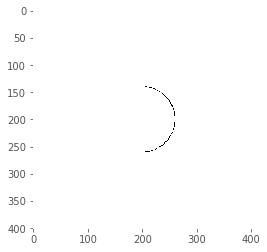

In [4]:
num_beam = params.num_beam
beams = np.ones(num_beam) * 5 + 1.0
# beams = np.random.random(num_beam) * 10 + 1.0
angles = np.linspace(0, 2 * pi, num_beam) - pi

laser = get_360_laser(beams, 0.0, params)
obs, vis = laser_to_grid(laser, params.g_step)
ih, iw = params.ih, params.iw
input = get_input(obs, vis, 0, 0, ih, iw)

plt.imshow(obs, cmap='Greys')
# plt.imshow(vis, cmap='Greys')

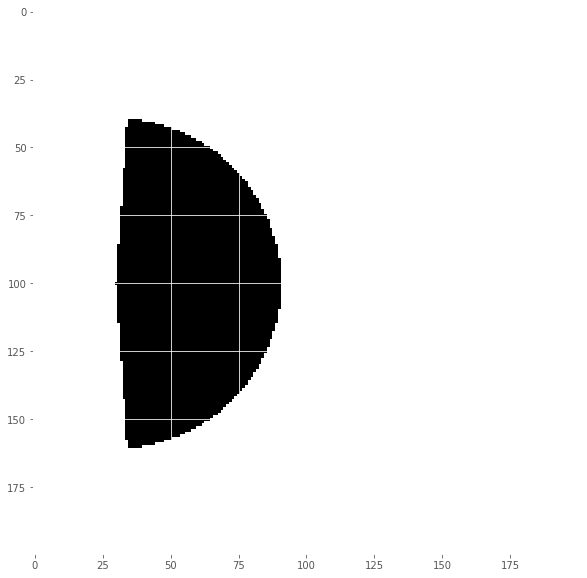

In [5]:
input = get_input(obs, vis, 10, 0, ih, iw)
plt.figure(figsize=(10, 10))
plt.imshow(input[1], cmap='Greys')

In [6]:
import sys
sys.path.append('/opt/ros/melodic/lib/python2.7/dist-packages')

In [7]:
# !pip install rospkg catkin_pkg --quiet
# !pip install gnupg --quiet

In [8]:
import rosbag

No handlers could be found for logger "rosout"


In [9]:

angle_min, angle_max, angle_increment = None, None, None

ranges = []

count = 0
for topic, msg, t in rosbag.Bag('./data/shitang.bag').read_messages():
    if topic == '/scan':
        if not angle_min:
            angle_min = msg.angle_min
            angle_max = msg.angle_max
            angle_increment = msg.angle_increment
            
        if count % 10 == 0:
            ranges.append(msg.ranges)
    
    count += 1
    if len(ranges) > 1000:
        break

In [10]:
params = Params(angle_min, angle_max, angle_increment)

In [11]:
r0=ranges[0]

In [12]:
rg = np.array(ranges)

In [13]:
rg = np.where(rg > 0.01, rg, 50.)

In [14]:
rg.min(axis=1)[:10]

array([1.48899996, 1.495     , 1.48800004, 1.48699999, 1.495     ,
       1.48699999, 1.49100006, 1.49100006, 1.49600005, 1.48399997])

In [15]:
grid_dist[200,200]

0.0

In [16]:
from ipywidgets import interact

0
50


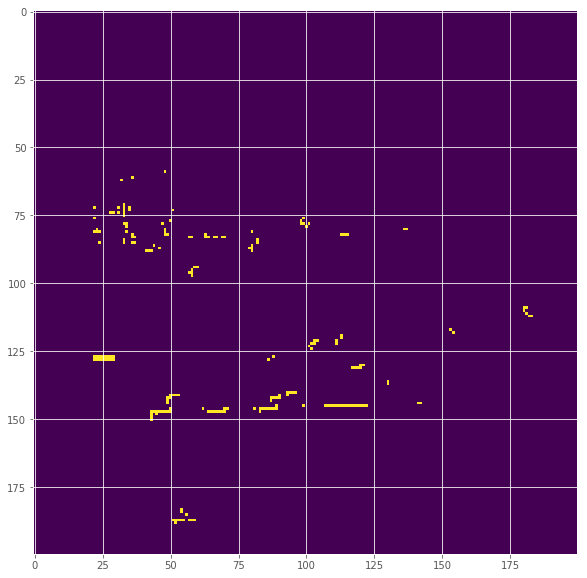

In [17]:

import matplotlib.animation as animation
fig = plt.figure(figsize=(10, 10))


ims = []
for i in range(100):
    costmap = laser_to_map(rg[i], 0., 0., 0., params)
    ims.append([plt.imshow(costmap[0])])
    if i%50==0:
        print(i)

anim = animation.ArtistAnimation(fig, ims, interval=500, blit=True, repeat_delay=100)

from IPython.display import HTML
HTML(anim.to_html5_video())

0
50


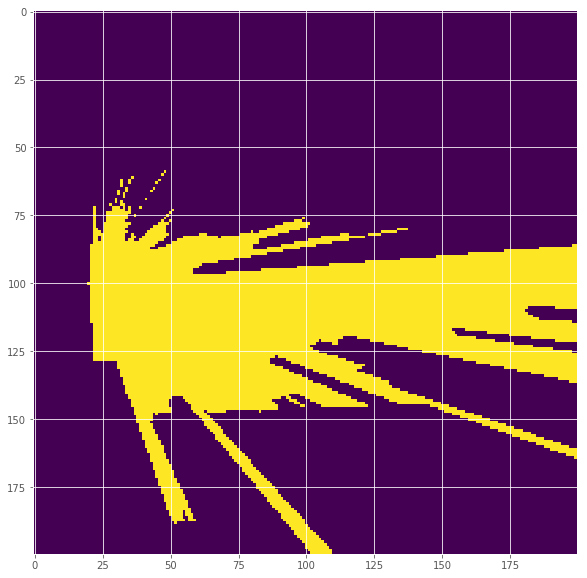

In [18]:

import matplotlib.animation as animation
fig = plt.figure(figsize=(10, 10))


ims = []
for i in range(100):
    costmap = laser_to_map(rg[i], 0., 0., 0., params)
    ims.append([plt.imshow(costmap[1])])
    if i%50==0:
        print(i)

anim = animation.ArtistAnimation(fig, ims, interval=25, blit=True, repeat_delay=100)

from IPython.display import HTML
HTML(anim.to_html5_video())

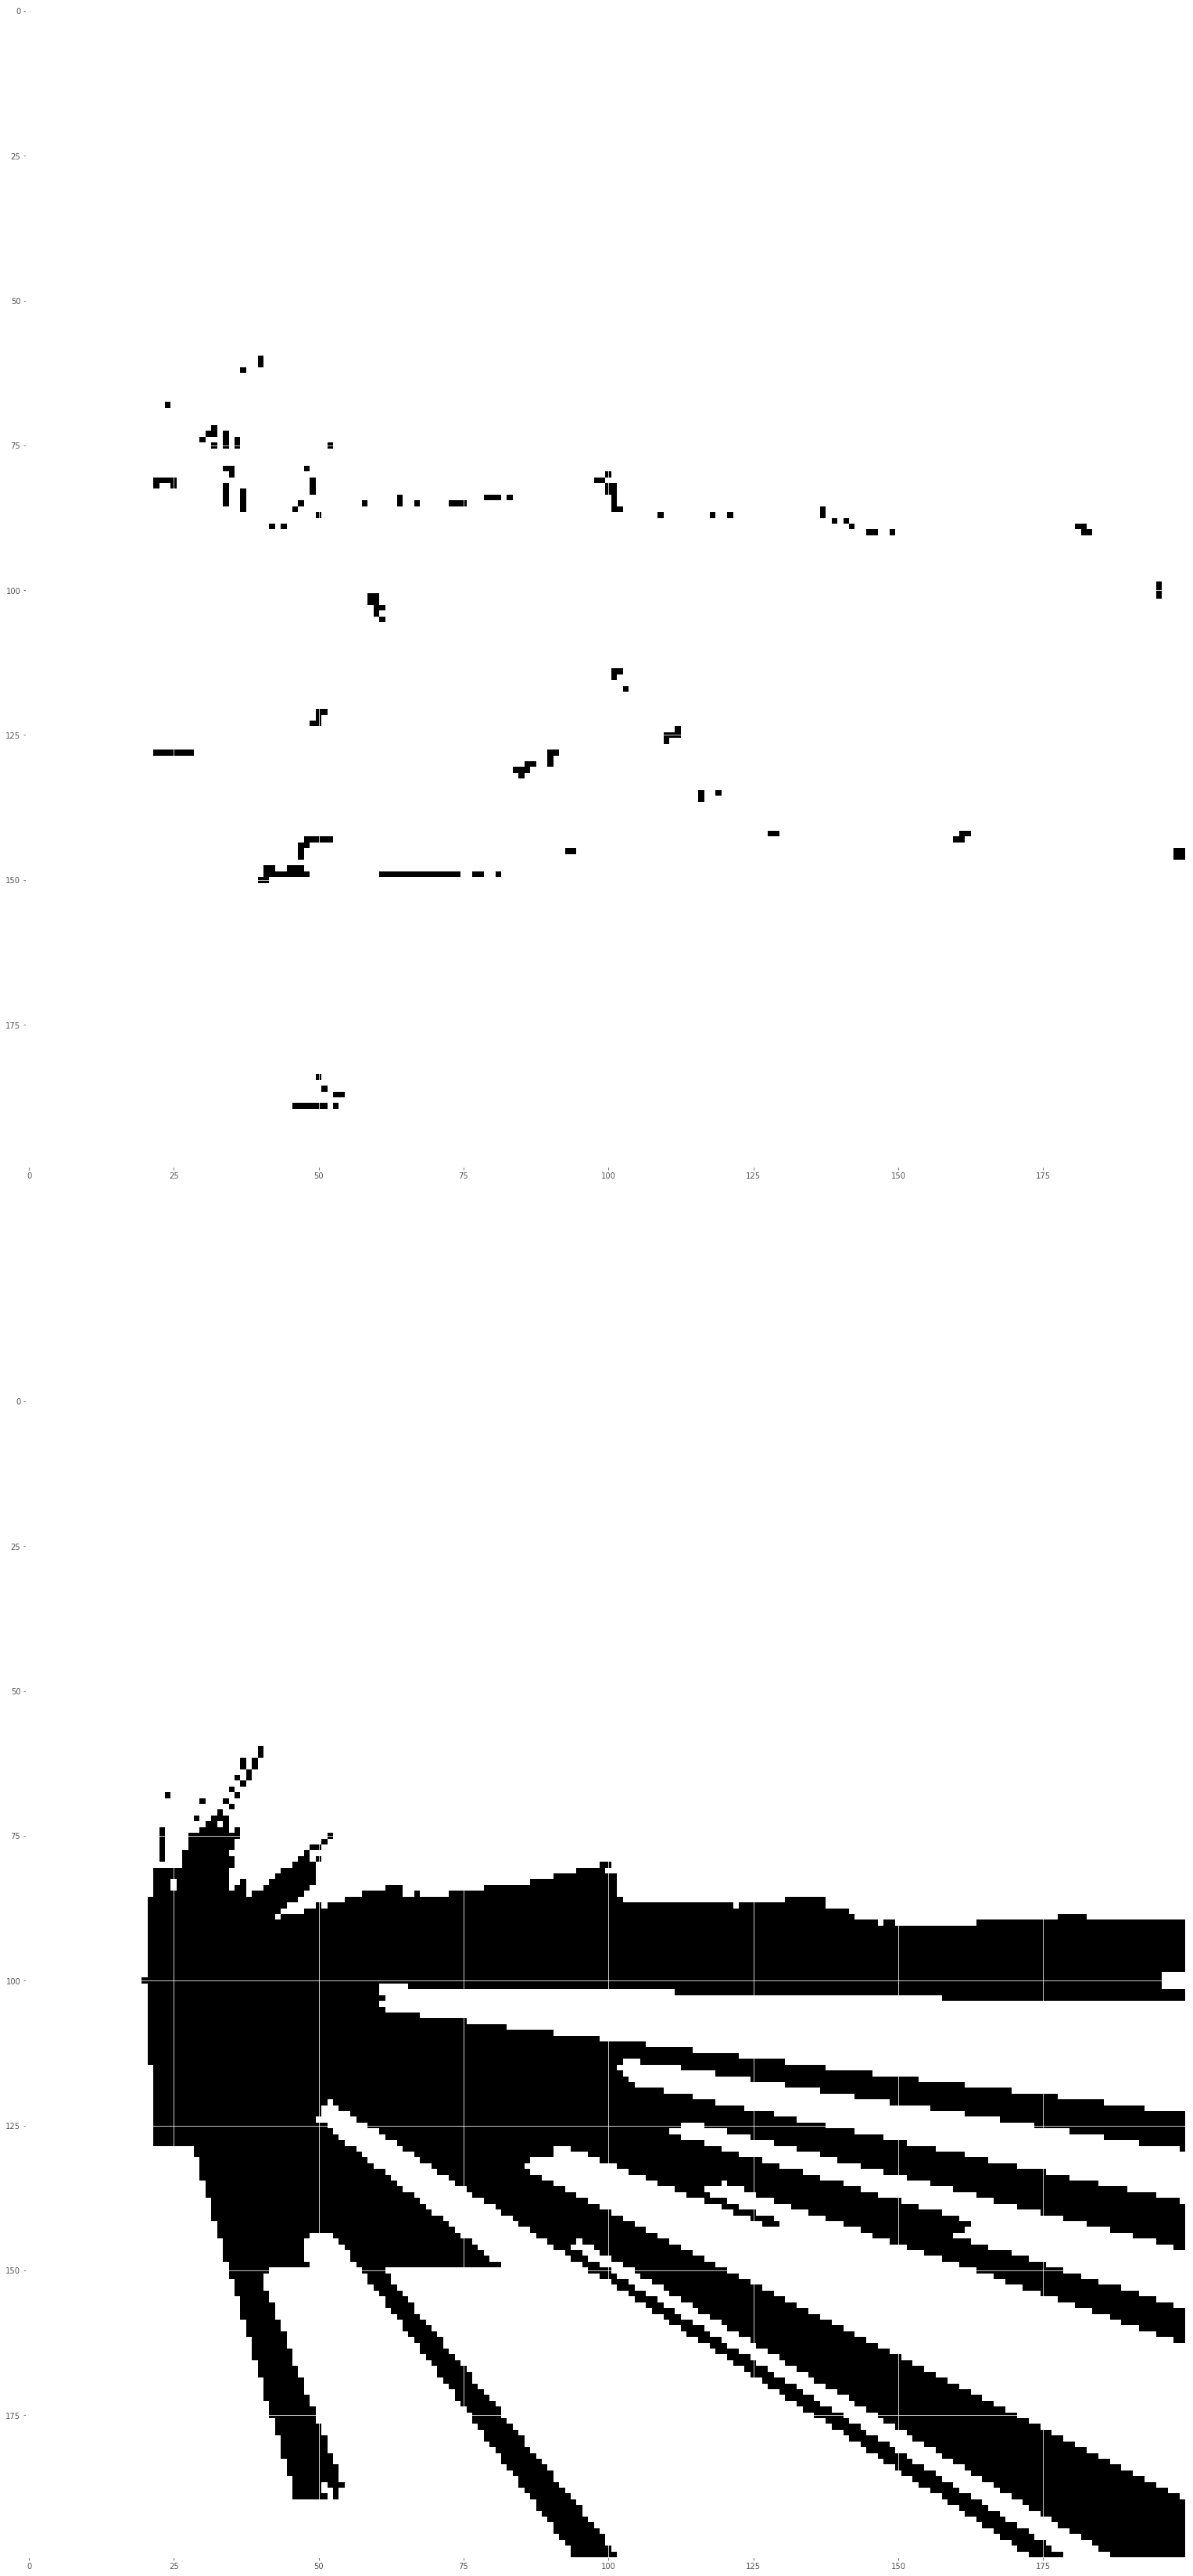

In [19]:

costmap = laser_to_map(rg[10], 0., 0., 0., params)

fig, axes = plt.subplots(2,1, figsize=(60,60))
show_input(costmap, axes)

In [20]:
angles = np.linspace(angle_min, angle_max, 688)

In [21]:
round((angle_max-angle_min)/angle_increment)

687

In [22]:
angle_min

-1.5009831190109253

In [23]:
angle_max

1.4966198205947876

In [24]:
angle_increment

0.004363323096185923

In [25]:
import math
math.degrees(angle_min)

-85.99999783970858